In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


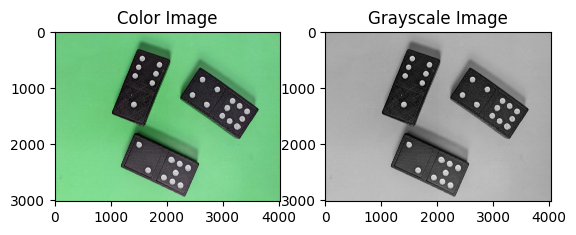

In [2]:
# Set matplotlib to always display images in cmap gray
plt.rcParams['image.cmap'] = 'gray'

# load a jpeg image from file
imgColor = cv2.imread('images/dominos.jpg', cv2.IMREAD_COLOR)

# convert to grayscale
imgGray = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)

# show input image and grayscale image side by side 
plt.subplot(121); plt.imshow(imgColor); plt.title('Color Image')
plt.subplot(122); plt.imshow(imgGray); plt.title('Grayscale Image')
plt.show()


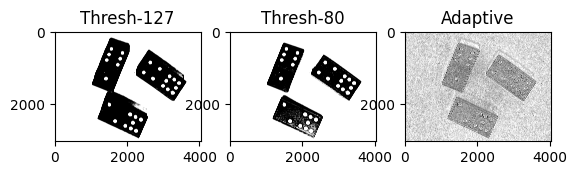

In [11]:
# Grayscale thresholding
# Threshold the grayscale image with the median intensity of 127
ret, thresholded = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)

# Display the images side by side 
threshVal = 80
ret, thresholded2 = cv2.threshold(imgGray, threshVal, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
adaptive_thresholded = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the images side by side 
plt.subplot(131); plt.imshow(thresholded); plt.title('Thresh-127')
plt.subplot(132); plt.imshow(thresholded2); plt.title('Thresh-'+str(threshVal))
plt.subplot(133); plt.imshow(adaptive_thresholded); plt.title('Adaptive')
plt.show()

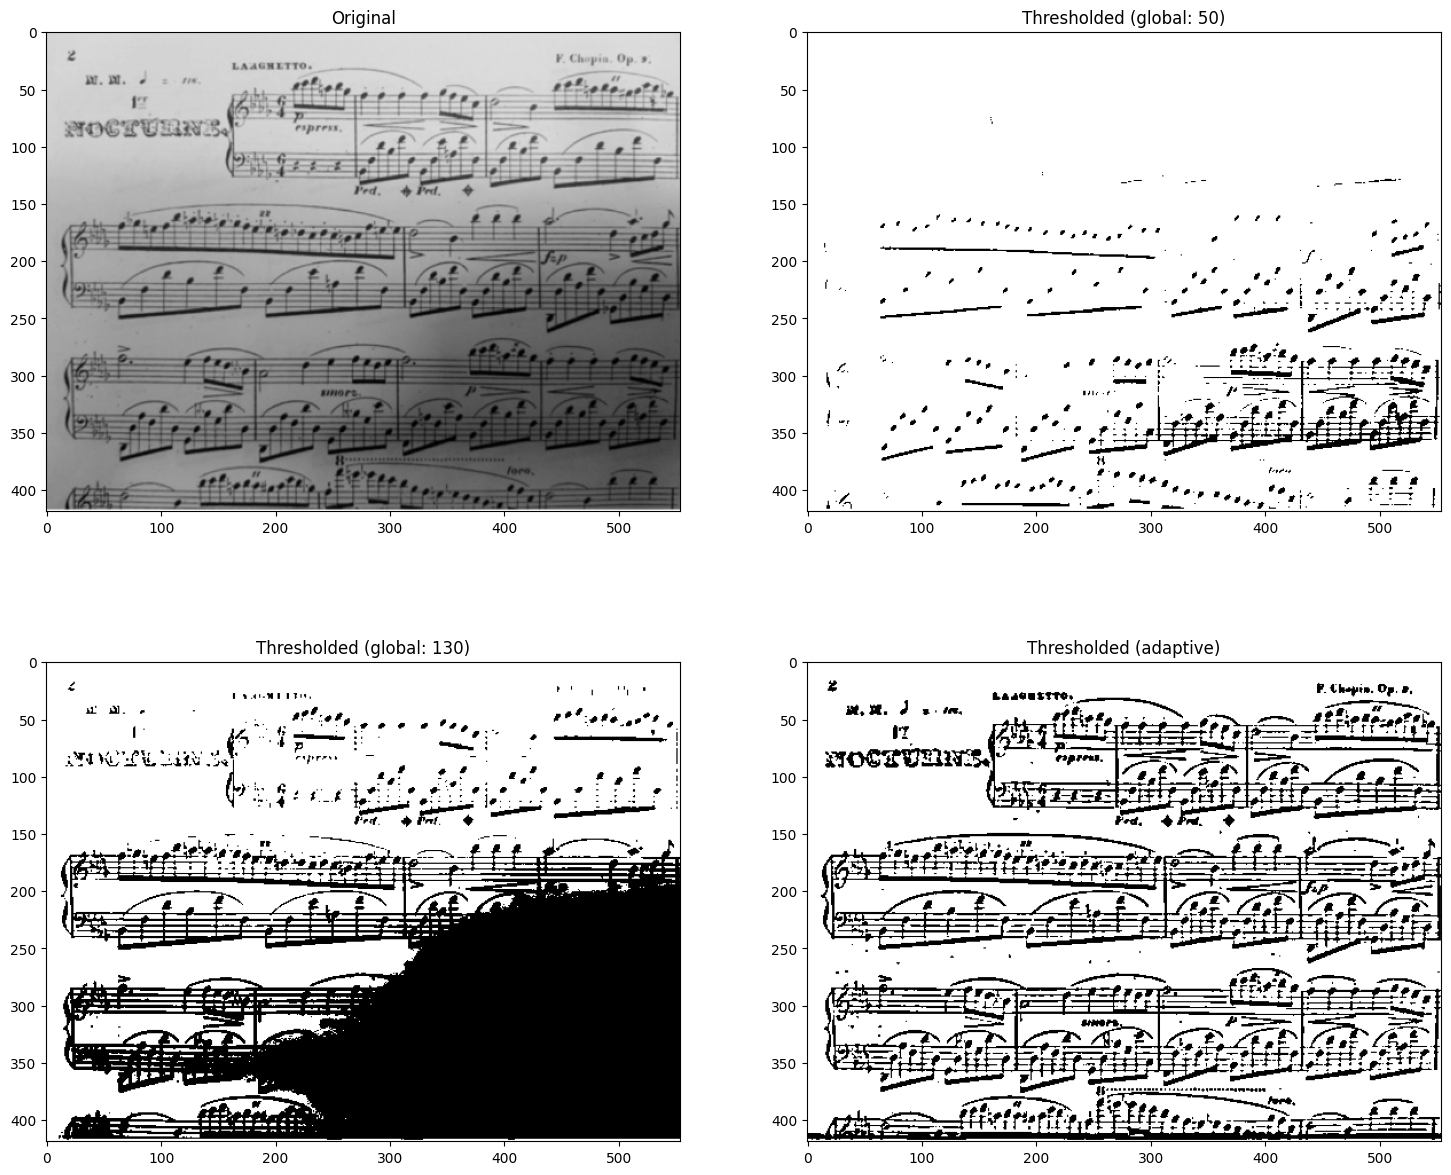

In [12]:
# Read the original image.
img = cv2.imread('images/Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Display the images.
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Thresholded (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Thresholded (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Thresholded (adaptive)');

#Demo: How can the display issue be rectified ? 

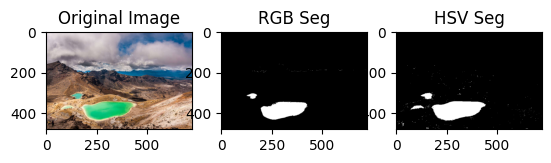

In [13]:
imgLake = cv2.imread('images/emeraldLake.jpg', cv2.IMREAD_COLOR)
imgLakeRGB = cv2.cvtColor(imgLake, cv2.COLOR_BGR2RGB)

# Segment out the emerald lake using Color Thresholding
imgLakeHSV = cv2.cvtColor(imgLake, cv2.COLOR_BGR2HSV)

lowerB = np.array([0, 158, 67])
upperB = np.array([140, 244, 205])
maskLakeRGB = cv2.inRange(imgLakeRGB, lowerB, upperB)


lowerB = np.array([20, 30, 0])
upperB = np.array([90, 255,255])
maskLakeHSV = cv2.inRange(imgLakeHSV, lowerB, upperB)

plt.subplot(131); plt.imshow(imgLakeRGB); plt.title('Original Image')
plt.subplot(132); plt.imshow(maskLakeRGB, cmap = 'gray'); plt.title('RGB Seg')
plt.subplot(133); plt.imshow(maskLakeHSV, cmap ='gray'); plt.title('HSV Seg')
plt.show()

Average RGB values:  [245.30548063 215.34855238 218.50985651]


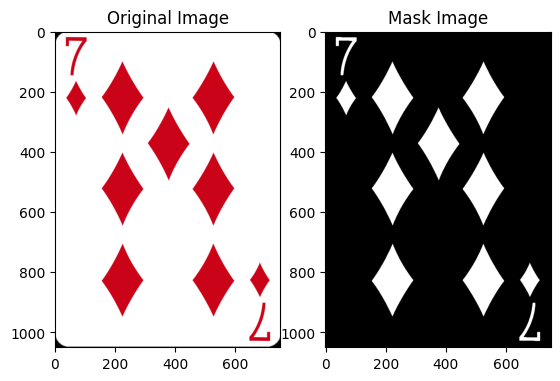

Number of contours: 11
Area: 1 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 2 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 3 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 4 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 5 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 6 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 7 = 14998.5, Perimeter:594.0802953243256,Aspect Ratio: 23.53111293080227
Area: 8 = 3305.5, Perimeter:277.60511887073517,Aspect Ratio: 23.314052949095448
Area: 9 = 3305.5, Perimeter:277.60511887073517,Aspect Ratio: 23.314052949095448
Area: 10 = 2009.5, Perimeter:451.0365778207779,Aspect Ratio: 101.23612566921057
Area: 11 = 2009.5, Perimeter:451.0365778207779,Aspect Ratio: 101.23612566921057


In [3]:
# Blob property analysis - Playing card 
imgCard1 = cv2.imread('images/red_diamond_07.png', cv2.IMREAD_COLOR)
imgCard1 = cv2.cvtColor(imgCard1, cv2.COLOR_BGR2RGB)

# Find the average Red, Green and Blue values of the image
averageColor = imgCard1.mean(axis=0).mean(axis=0)
print('Average RGB values: ', averageColor)


# Create a mask for the red color
lowerB = np.array([100, 0, 0])
upperB = np.array([255, 100, 100])
maskCard = cv2.inRange(imgCard1, lowerB, upperB)

# Display the original image and the mask image side by side
plt.subplot(121); plt.imshow(imgCard1); plt.title('Original Image'); 
plt.subplot(122); plt.imshow(maskCard, cmap='gray'); plt.title('Mask Image'); plt.show()

# Find the contours on the mask image
contours, hierarchy = cv2.findContours(maskCard, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of contours
print('Number of contours:', len(contours))

# Sort the contours based on area, in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Print the contour properties 
for i in range(len(contours)):
    print('Area: '+str(i+1)+' = '+str(cv2.contourArea(contours[i]))
          +', Perimeter:' +str(cv2.arcLength(contours[i], True))
          + ',Aspect Ratio: '+str(cv2.arcLength(contours[i], True)**2/cv2.contourArea(contours[i])))
    

OpenCV : Getting Started Documentation
https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

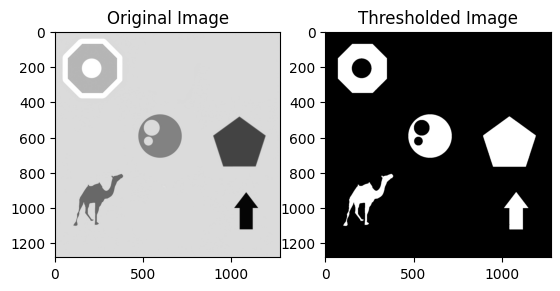

Number of all contours found = 8
Number of external contours found = 5


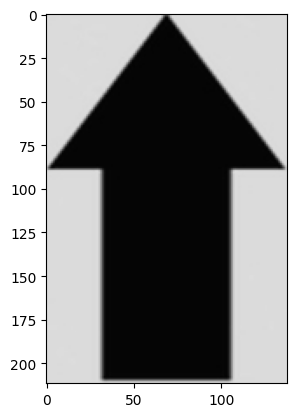

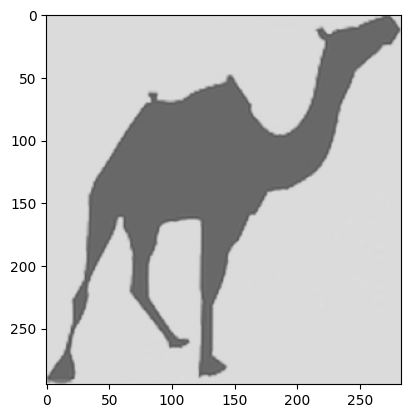

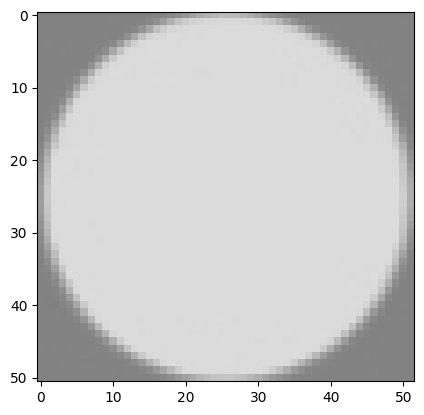

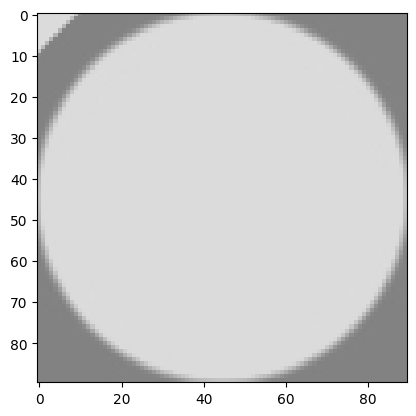

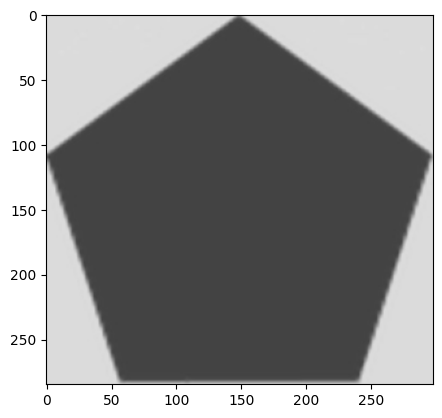

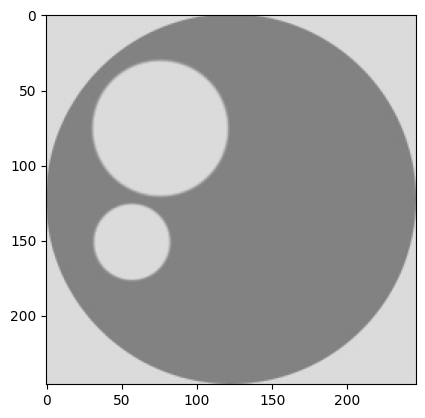

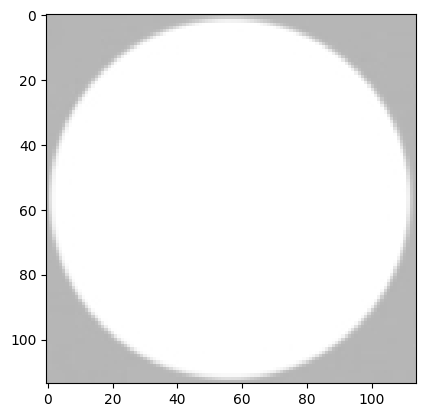

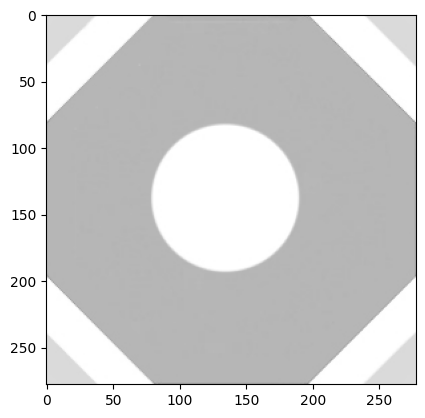

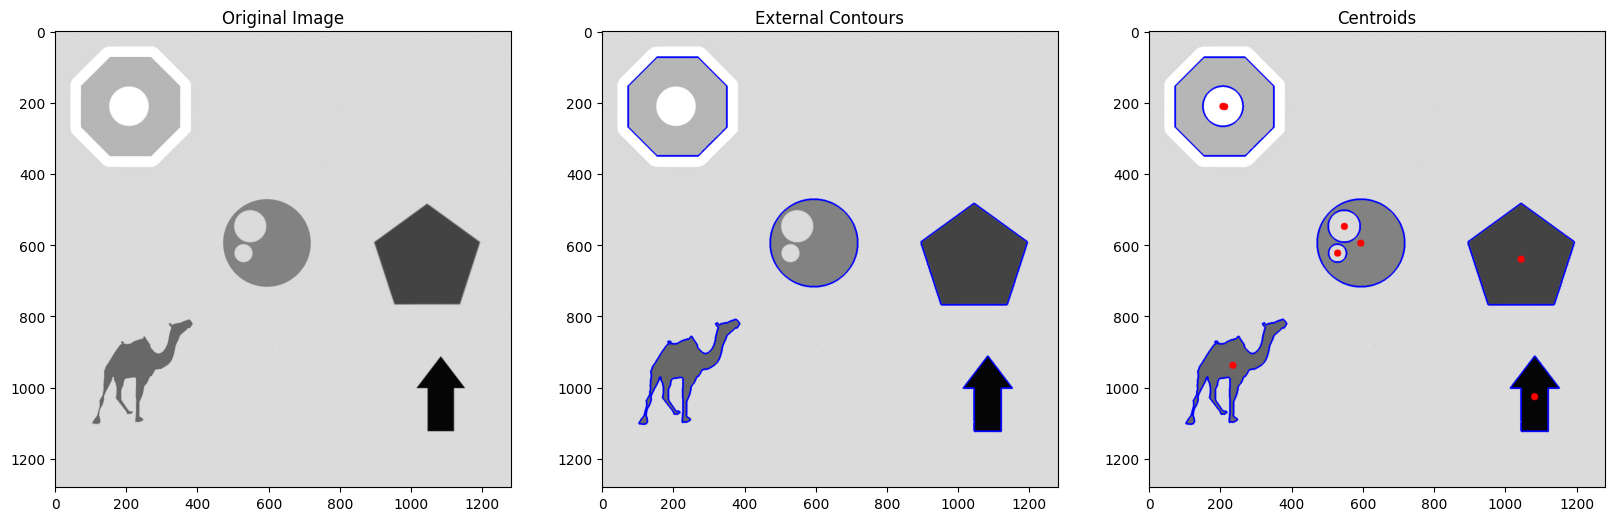

In [8]:
# Drawing contours 
image = cv2.imread('images/shapes.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold image 
ret, thresh = cv2.threshold(imageGray, 200, 255, cv2.THRESH_BINARY_INV)

# Display original image and thersholded image side by side
plt.subplot(121); plt.imshow(image); plt.title('Original Image')
plt.subplot(122); plt.imshow(thresh, cmap='gray'); plt.title('Thresholded Image')
plt.show()


# Find all contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Number of contours.
print("Number of all contours found = {}".format(len(contours)))


# Create a copy of the original image.
imageCopy1 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy1, contours, -1, (0,0,255), 3)

# Find external contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of external contours found = {}".format(len(contours)))

# Create a copy of the original image.
imageCopy2 = image.copy()

# Draw all the external contours.
cv2.drawContours(imageCopy2, contours, -1, (0,0,255), 4)

# Finding & drawing center of mass
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image.
imageCopy5 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy5, contours, -1, (0,0,255), 3) 

for cnt in contours:
    # Use the contour moments to find the centroid.
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center.
    cv2.circle(imageCopy5, (x,y), 10, (255,0,0), -1)

    # Crop out the contour and display it.
    x,y,w,h = cv2.boundingRect(cnt)
    
    # Extract the region of interest.
    roi = image[y:y+h, x:x+w]
    # Display the cropped image.
    plt.imshow(roi)
    plt.show()

    # Save the cropped region with a unique name.
    cv2.imwrite('images/cropped_'+str(x)+'.png', roi)


# Display image, imageCopy2 & imageCopy5 side by side
plt.figure(figsize=[20,10])
plt.subplot(131); plt.imshow(image); plt.title('Original Image')
plt.subplot(132); plt.imshow(imageCopy2); plt.title('External Contours')
plt.subplot(133); plt.imshow(imageCopy5); plt.title('Centroids')
plt.show()


# Demo: How to add imageCopy1 to the mix 

# Demo : How to find centroid of perforated circle ?

Total number of frames: 240


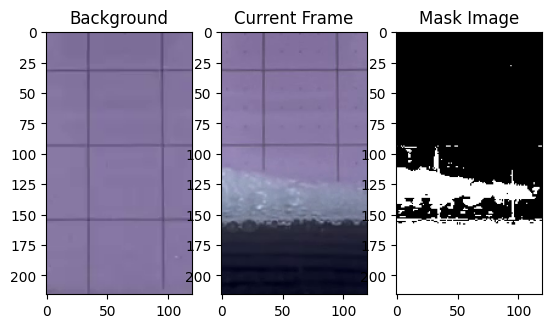

In [ ]:
# Background subtraction and liquid level (Demonstration)
# Assignment will be detailed in lecture 4

# Create a VideoCapture object
videoReader = cv2.VideoCapture('images/liquidVideo.mp4')

# Read the first frame
ret, img1 = videoReader.read()

# Get the total number of frames in the video
total_frames = int(videoReader.get(cv2.CAP_PROP_FRAME_COUNT))
# Print the total number of frames
print('Total number of frames:', total_frames)


# Read frame at particular index
frame_index = 100
videoReader.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = videoReader.read()

# Convert img1 and frame to grayscale
img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY); frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

# Create a binary image based on the similarity between the current frame and the background
diffImg = cv2.absdiff(img1_g, frame_g)
ret, mask = cv2.threshold(diffImg, 15, 255, cv2.THRESH_BINARY)

plt.subplot(131); plt.imshow(img1); plt.title('Background')
plt.subplot(132); plt.imshow(frame); plt.title('Current Frame')
plt.subplot(133); plt.imshow(mask, cmap='gray'); plt.title('Mask Image')
plt.show()